In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = 'nyc_taxis.csv'

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Dimensiones del dataset
print("\nDimensiones del dataset (filas, columnas):")
print(df.shape)

Primeras filas del dataset:
      pickup_year pickup_month  pickup_day pickup_dayofweek  pickup_time  \
1319         2016          1.0         4.0              1.0          0.0   
1320         2016          1.0         4.0              1.0          0.0   
1321         2016          1.0         4.0              1.0          0.0   
1322         2016          1.0         4.0              1.0          0.0   
1323         2016          1.0         4.0              1.0          0.0   

      pickup_location_code  dropoff_location_code  trip_distance  trip_length  \
1319                   3.0               2.000000          11.80        880.0   
1320                   2.0               4.000000          17.27       1508.0   
1321                   3.0              33.782991          10.60       1024.0   
1322                   3.0               4.000000           8.03        943.0   
1323                   3.0               4.000000          11.10       1553.0   

      fare_amount  fees_amou

In [37]:
# identificacion de valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

 # Manejo de valores faltantes
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].mean(), inplace=True)  # Rellenar numéricos con la media

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Rellenar categóricos con la moda


Valores faltantes por columna:
pickup_year              0
pickup_month             0
pickup_day               0
pickup_dayofweek         0
pickup_time              0
pickup_location_code     0
dropoff_location_code    0
trip_distance            0
trip_length              0
fare_amount              0
fees_amount              0
tolls_amount             0
tip_amount               0
total_amount             0
payment_type             0
Matricula                0
Fecha_Licencia           0
dtype: int64


C:\Users\Sergio\AppData\Local\Temp\ipykernel_4420\2817157369.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)  # Rellenar numéricos con la media
C:\Users\Sergio\AppData\Local\Temp\ipykernel_4420\2817157369.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [39]:
# eliminacion de filas duplicadas
print("\nNumero de filas duplicadas antes de la limpieza:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Numero de filas duplicadas despues de la limpieza:", df.duplicated().sum())


Numero de filas duplicadas antes de la limpieza: 0
Numero de filas duplicadas despues de la limpieza: 0


In [ ]:
# Crear un diccionario de meses de español a inglés
meses_es_en = {
    "ene": "Jan", "feb": "Feb", "mar": "Mar", "abr": "Apr", "may": "May", "jun": "Jun",
    "jul": "Jul", "ago": "Aug", "sep": "Sep", "oct": "Oct", "nov": "Nov", "dic": "Dec"
}

# reemplaza los nombres de los meses en la columna "Fecha_Licencia"
df("Fecha_Licencia") = df["Fecha_Licencia"].astype(str).replace(meses_es_en, regex=True)

# conversion de tipos de datos
df["Fecha_Licencia"] = pd.to_datetime(df["Fecha_Licencia"], format="%b-%y", errors="coerce")

In [42]:
# generar estadisticas descriptivas
print("\nEstadísticas descriptivas del dataset:")
print(df.describe())


Estadísticas descriptivas del dataset:
        pickup_year    pickup_day   pickup_time  pickup_location_code  \
count  90015.000000  90015.000000  90015.000000          90015.000000   
mean    2200.030128     17.127964      3.380542              3.230063   
std     1818.024279     16.583661      3.096606              2.791509   
min     2016.000000      1.000000      0.000000              0.000000   
25%     2016.000000      8.000000      2.000000              2.000000   
50%     2016.000000     16.000000      3.000000              3.000000   
75%     2016.000000     23.000000      4.000000              4.000000   
max    20160.000000    156.882464     30.847073             29.593765   

       dropoff_location_code  trip_distance   trip_length   fare_amount  \
count           90015.000000   90015.000000  90015.000000  90015.000000   
mean                3.687951      13.887604   2438.386782     42.098951   
std                 3.342432      12.473213   3790.693658     36.814014   
mi

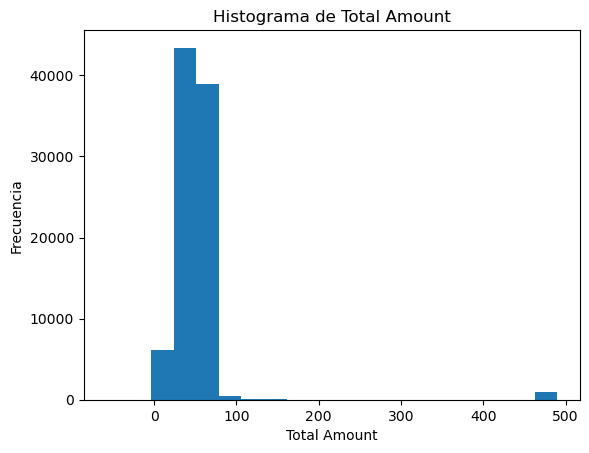

In [44]:
# visualizacion con histogramas
plt.hist(df['total_amount'], bins=20)
plt.title('Histograma de Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frecuencia')
plt.show()


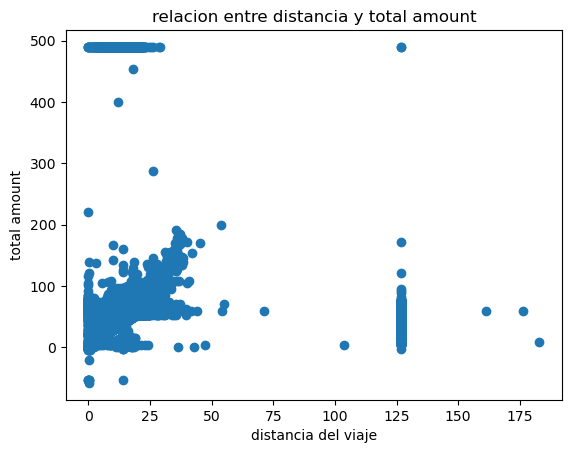

In [46]:
# Scatter plot entre ingresos y distancia
plt.scatter(df['trip_distance'], df['total_amount'])
plt.title('relacion entre distancia y total amount')
plt.xlabel('distancia del viaje')
plt.ylabel('total amount')
plt.show()
            